In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualisation
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import missingno as msno

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/violent-crime-rates-by-us-state/US_violent_crime.csv


In [73]:
df = pd.read_csv("../input/violent-crime-rates-by-us-state/US_violent_crime.csv")

In [74]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [75]:
df.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [76]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [77]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


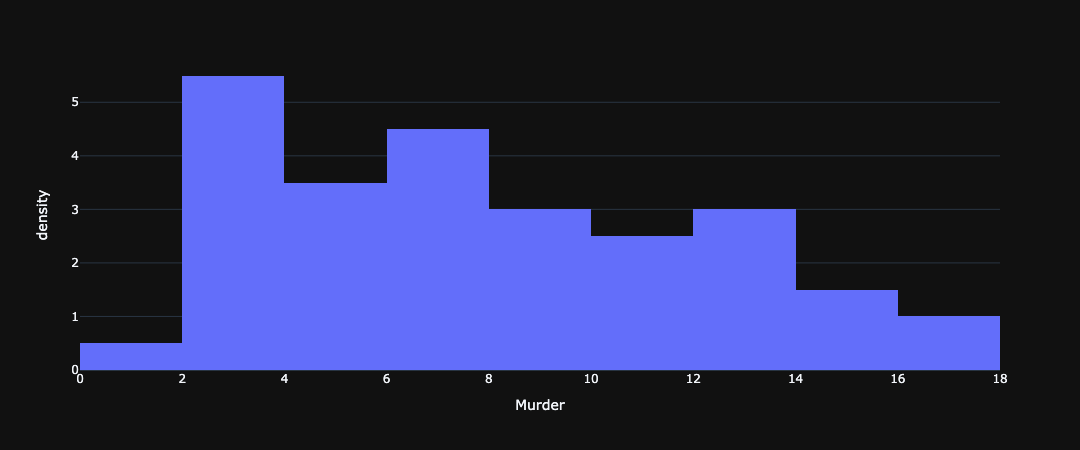

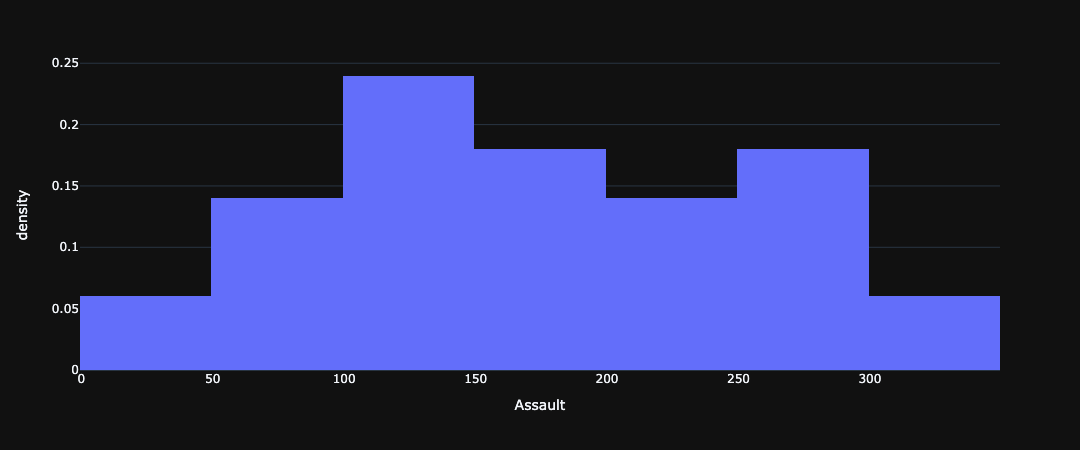

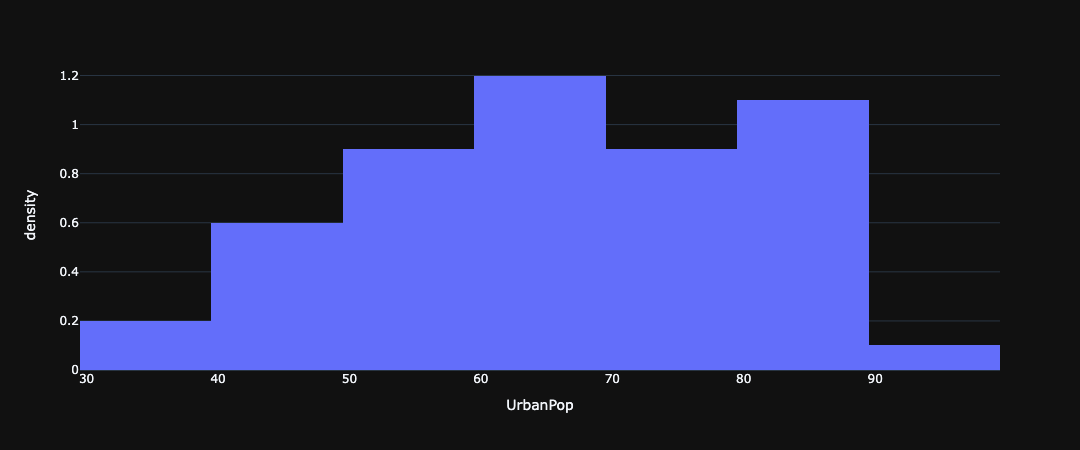

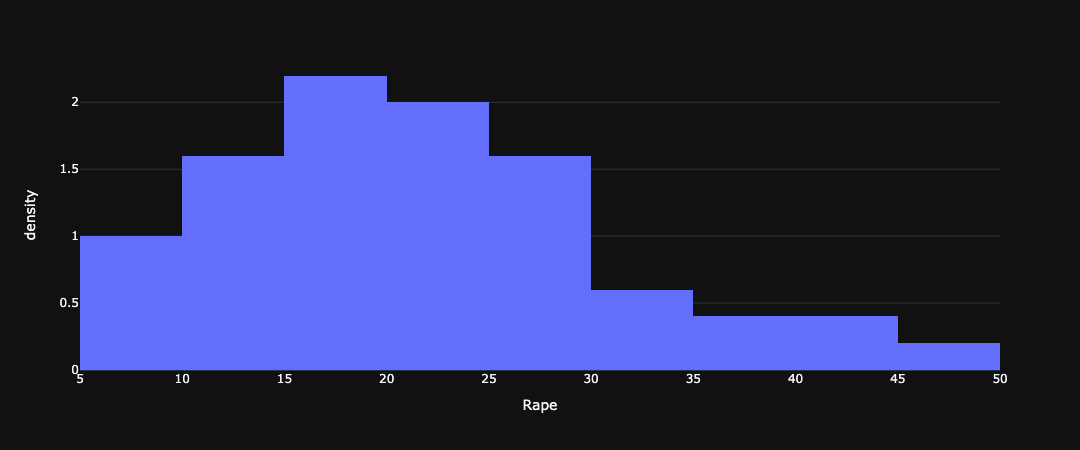

In [78]:
def hist(dataframe, col):
    fig = px.histogram(dataframe, x=col, histnorm="density")
    fig.update_layout(template = 'plotly_dark')
    fig.show()

for i in df.columns[1:]:
    hist(df, i)

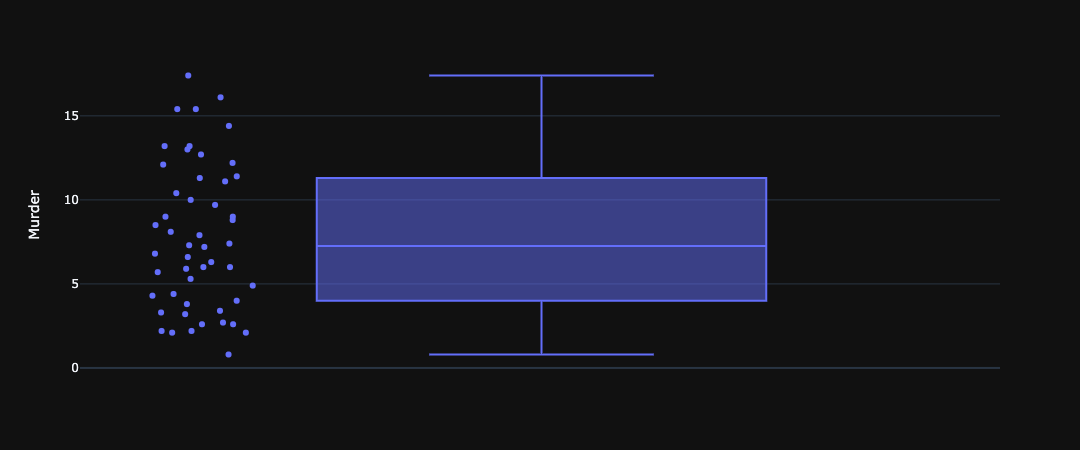

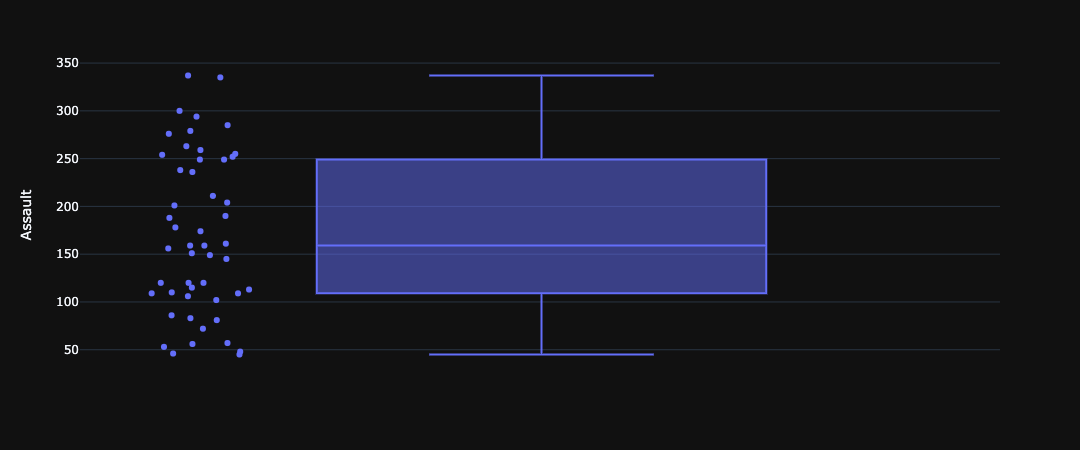

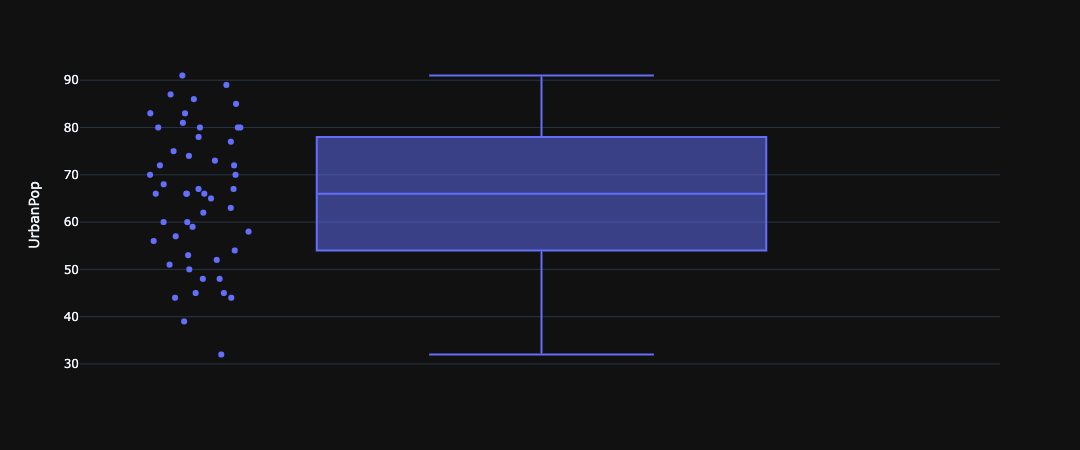

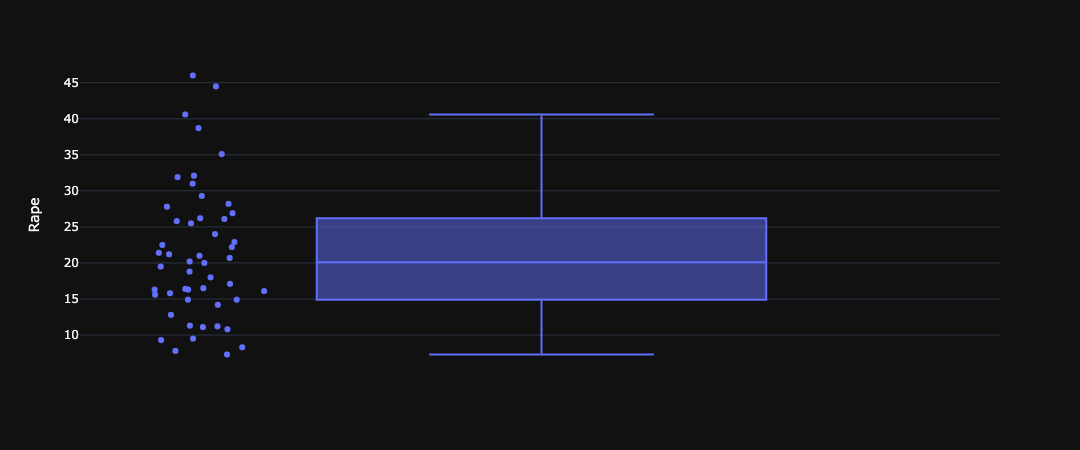

In [79]:
import plotly.express as px

def box(dataframe, col):
    fig = px.box(dataframe, y=col, points="all")
    fig.update_layout(template = 'plotly_dark')
    fig.show()
    

for i in df.columns[1:]:
    box(df, i)

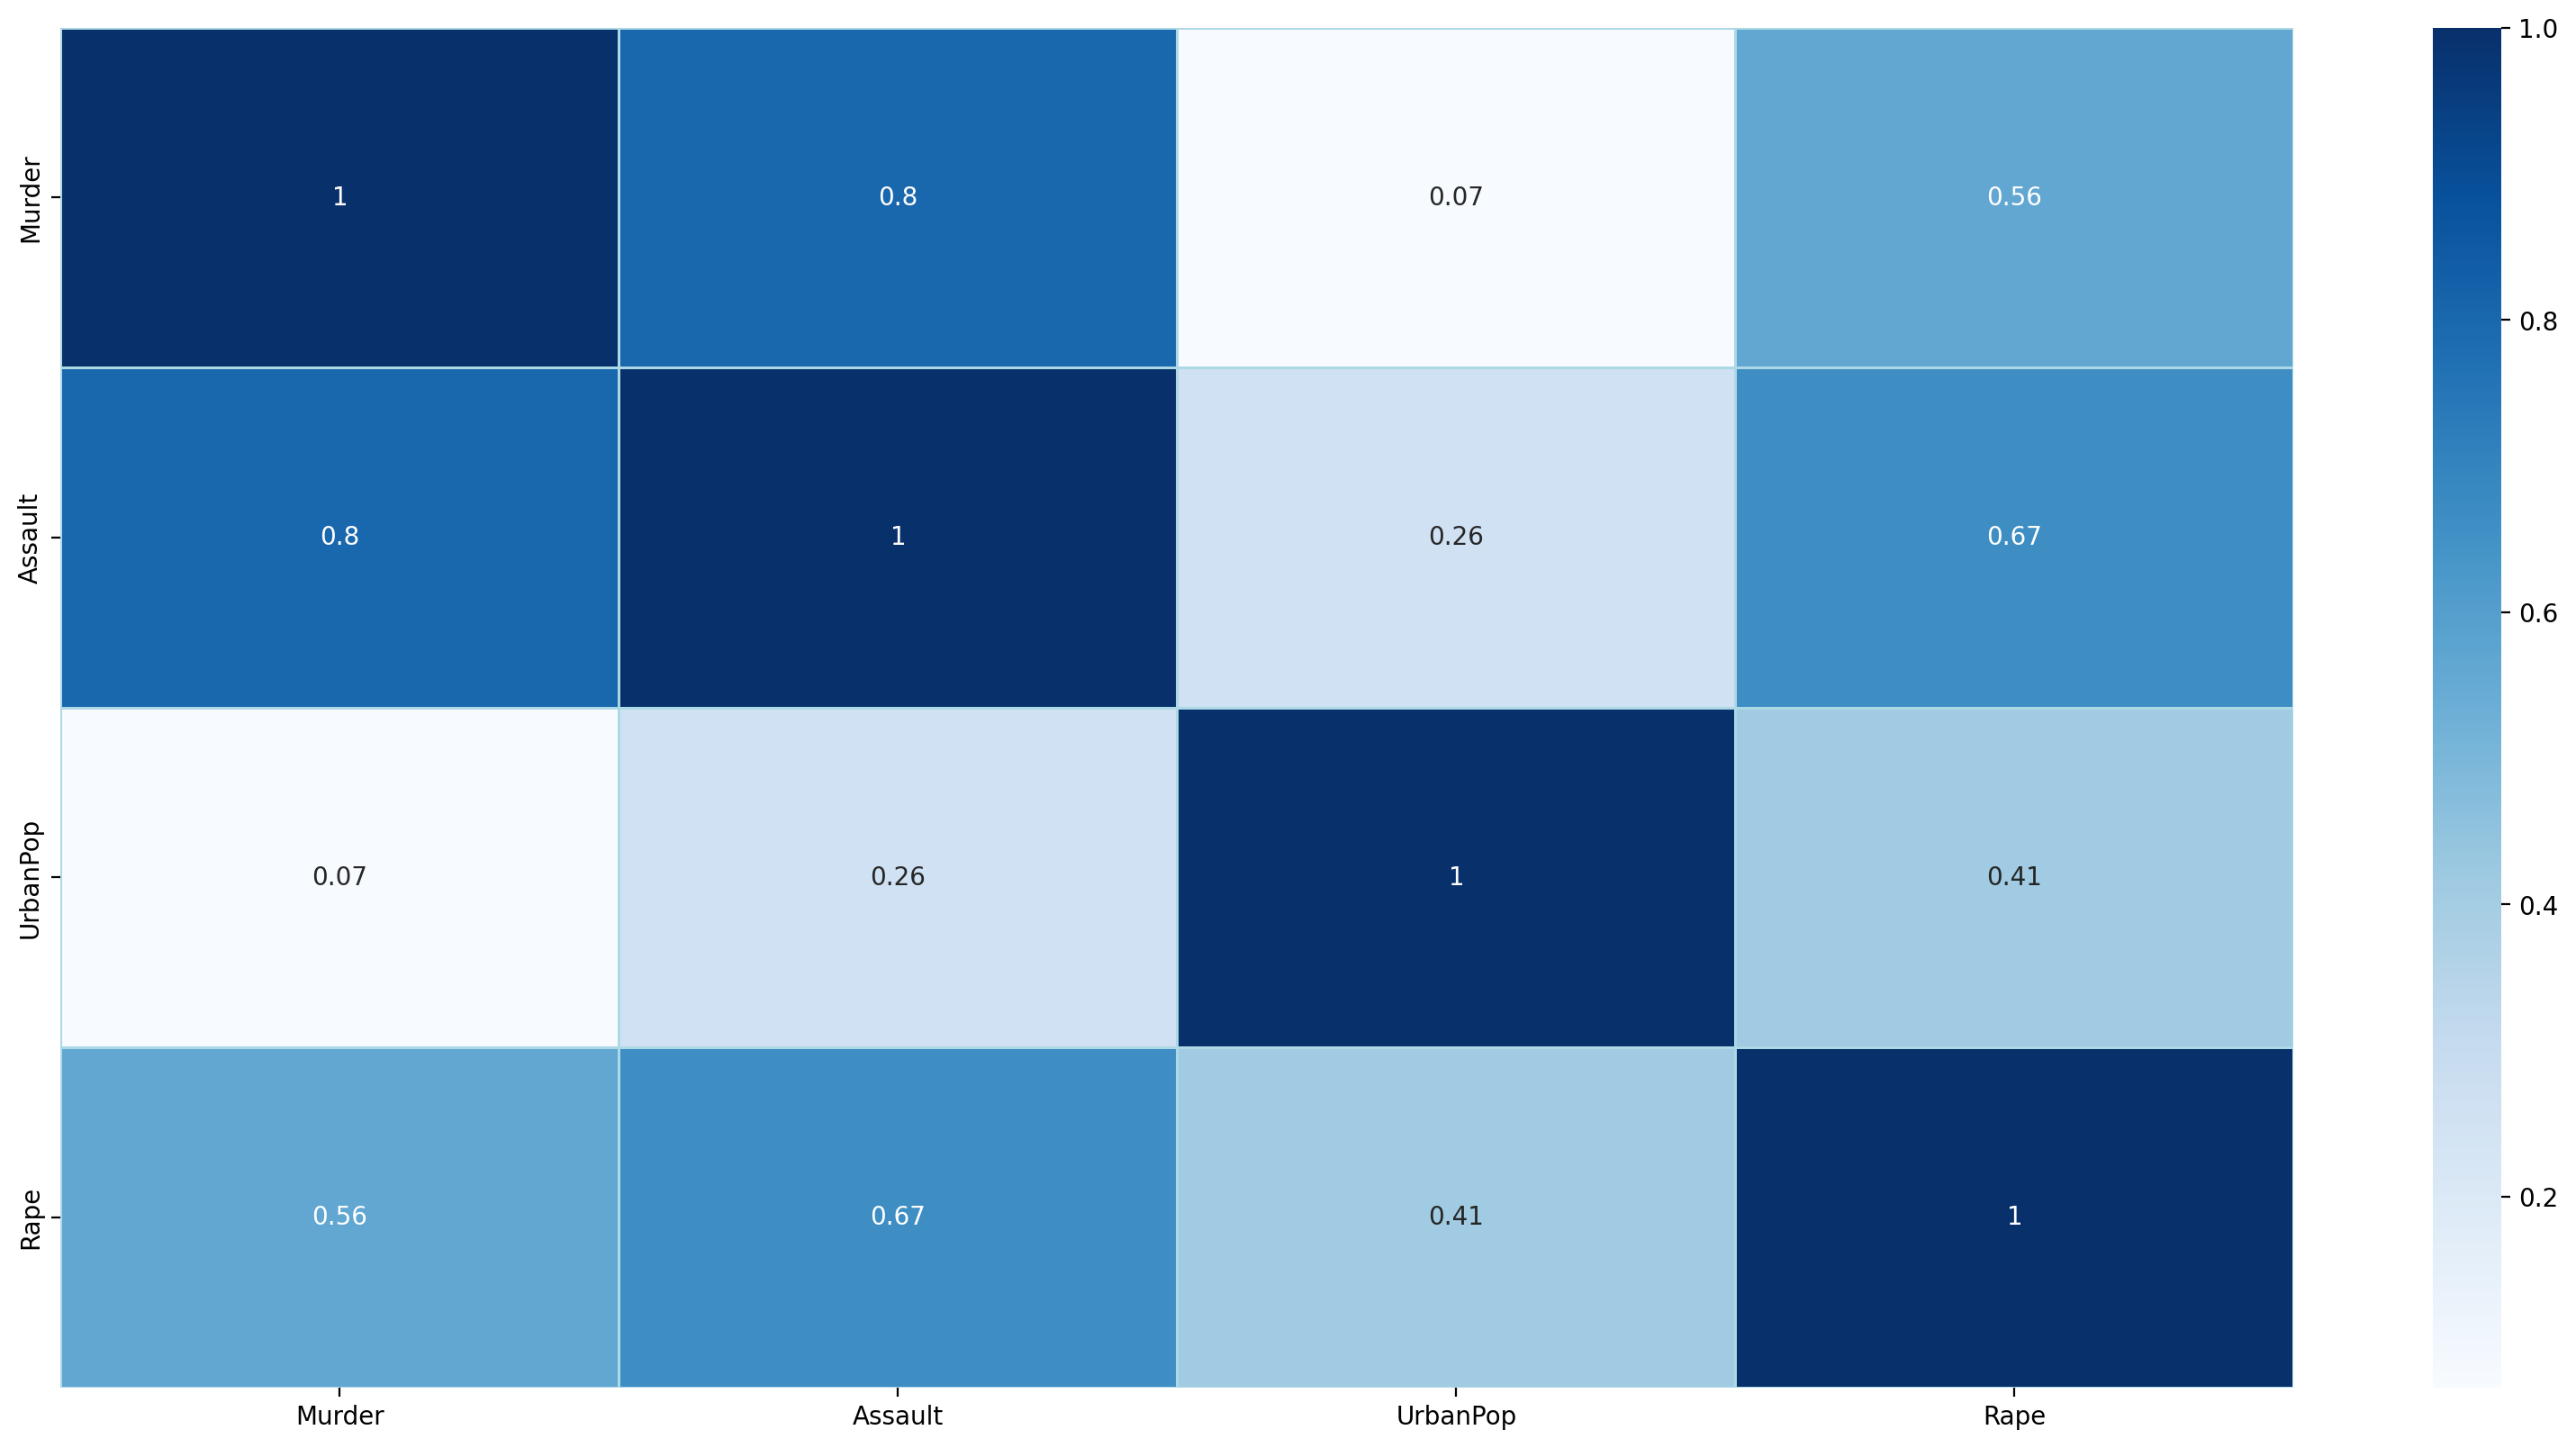

In [80]:
plt.figure(figsize=(20,10), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap="Blues", linewidths=1, linecolor='lightblue')
plt.show()

## K-means clustering

Why K-means clustering for this dataset?

In this scenario we will attempt to find groups which have not been explicitly labeled in the data.

1. Choose the number of K clusters
2. Select random centroids
3. Assign each data point the closest centroid
4. Compute and place the new centroid of each cluster
5. Reassign the data points to the new closest k centroid till no more reassignment

In [81]:
column_to_move = df.pop("Rape")

# insert column with insert(location, column_name, column_value)

df.insert(4, "Rape", column_to_move)

In [82]:
# assign to x (not using Rape or State for better visualisation)
X = df.iloc[:, 1:4].values

#### <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use."> Now we will use the Elbow Method to find the optimal value for K</a>

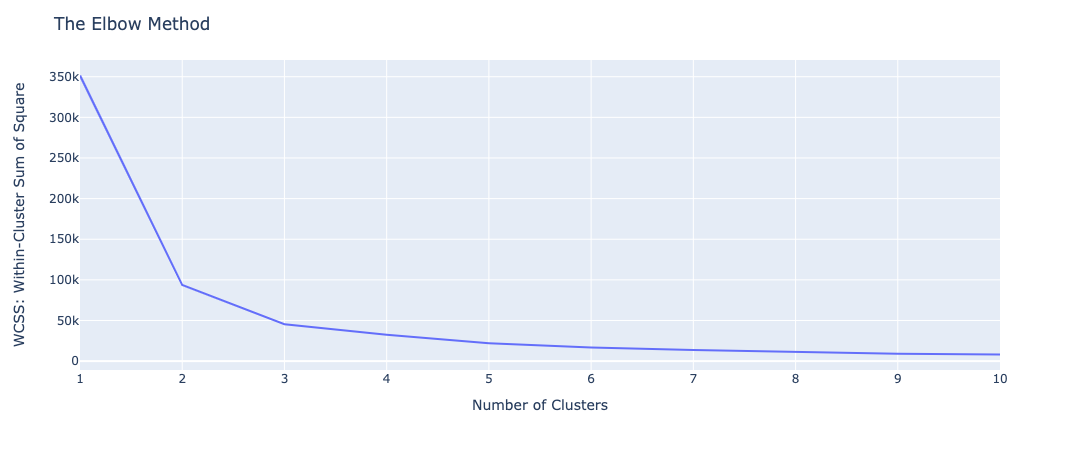

In [83]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = px.line(x=range(1,11), y=wcss)

# edit the layout
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Number of Clusters',
                   yaxis_title='WCSS: Within-Cluster Sum of Square')

fig.show()

In [84]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


### With urban pop column

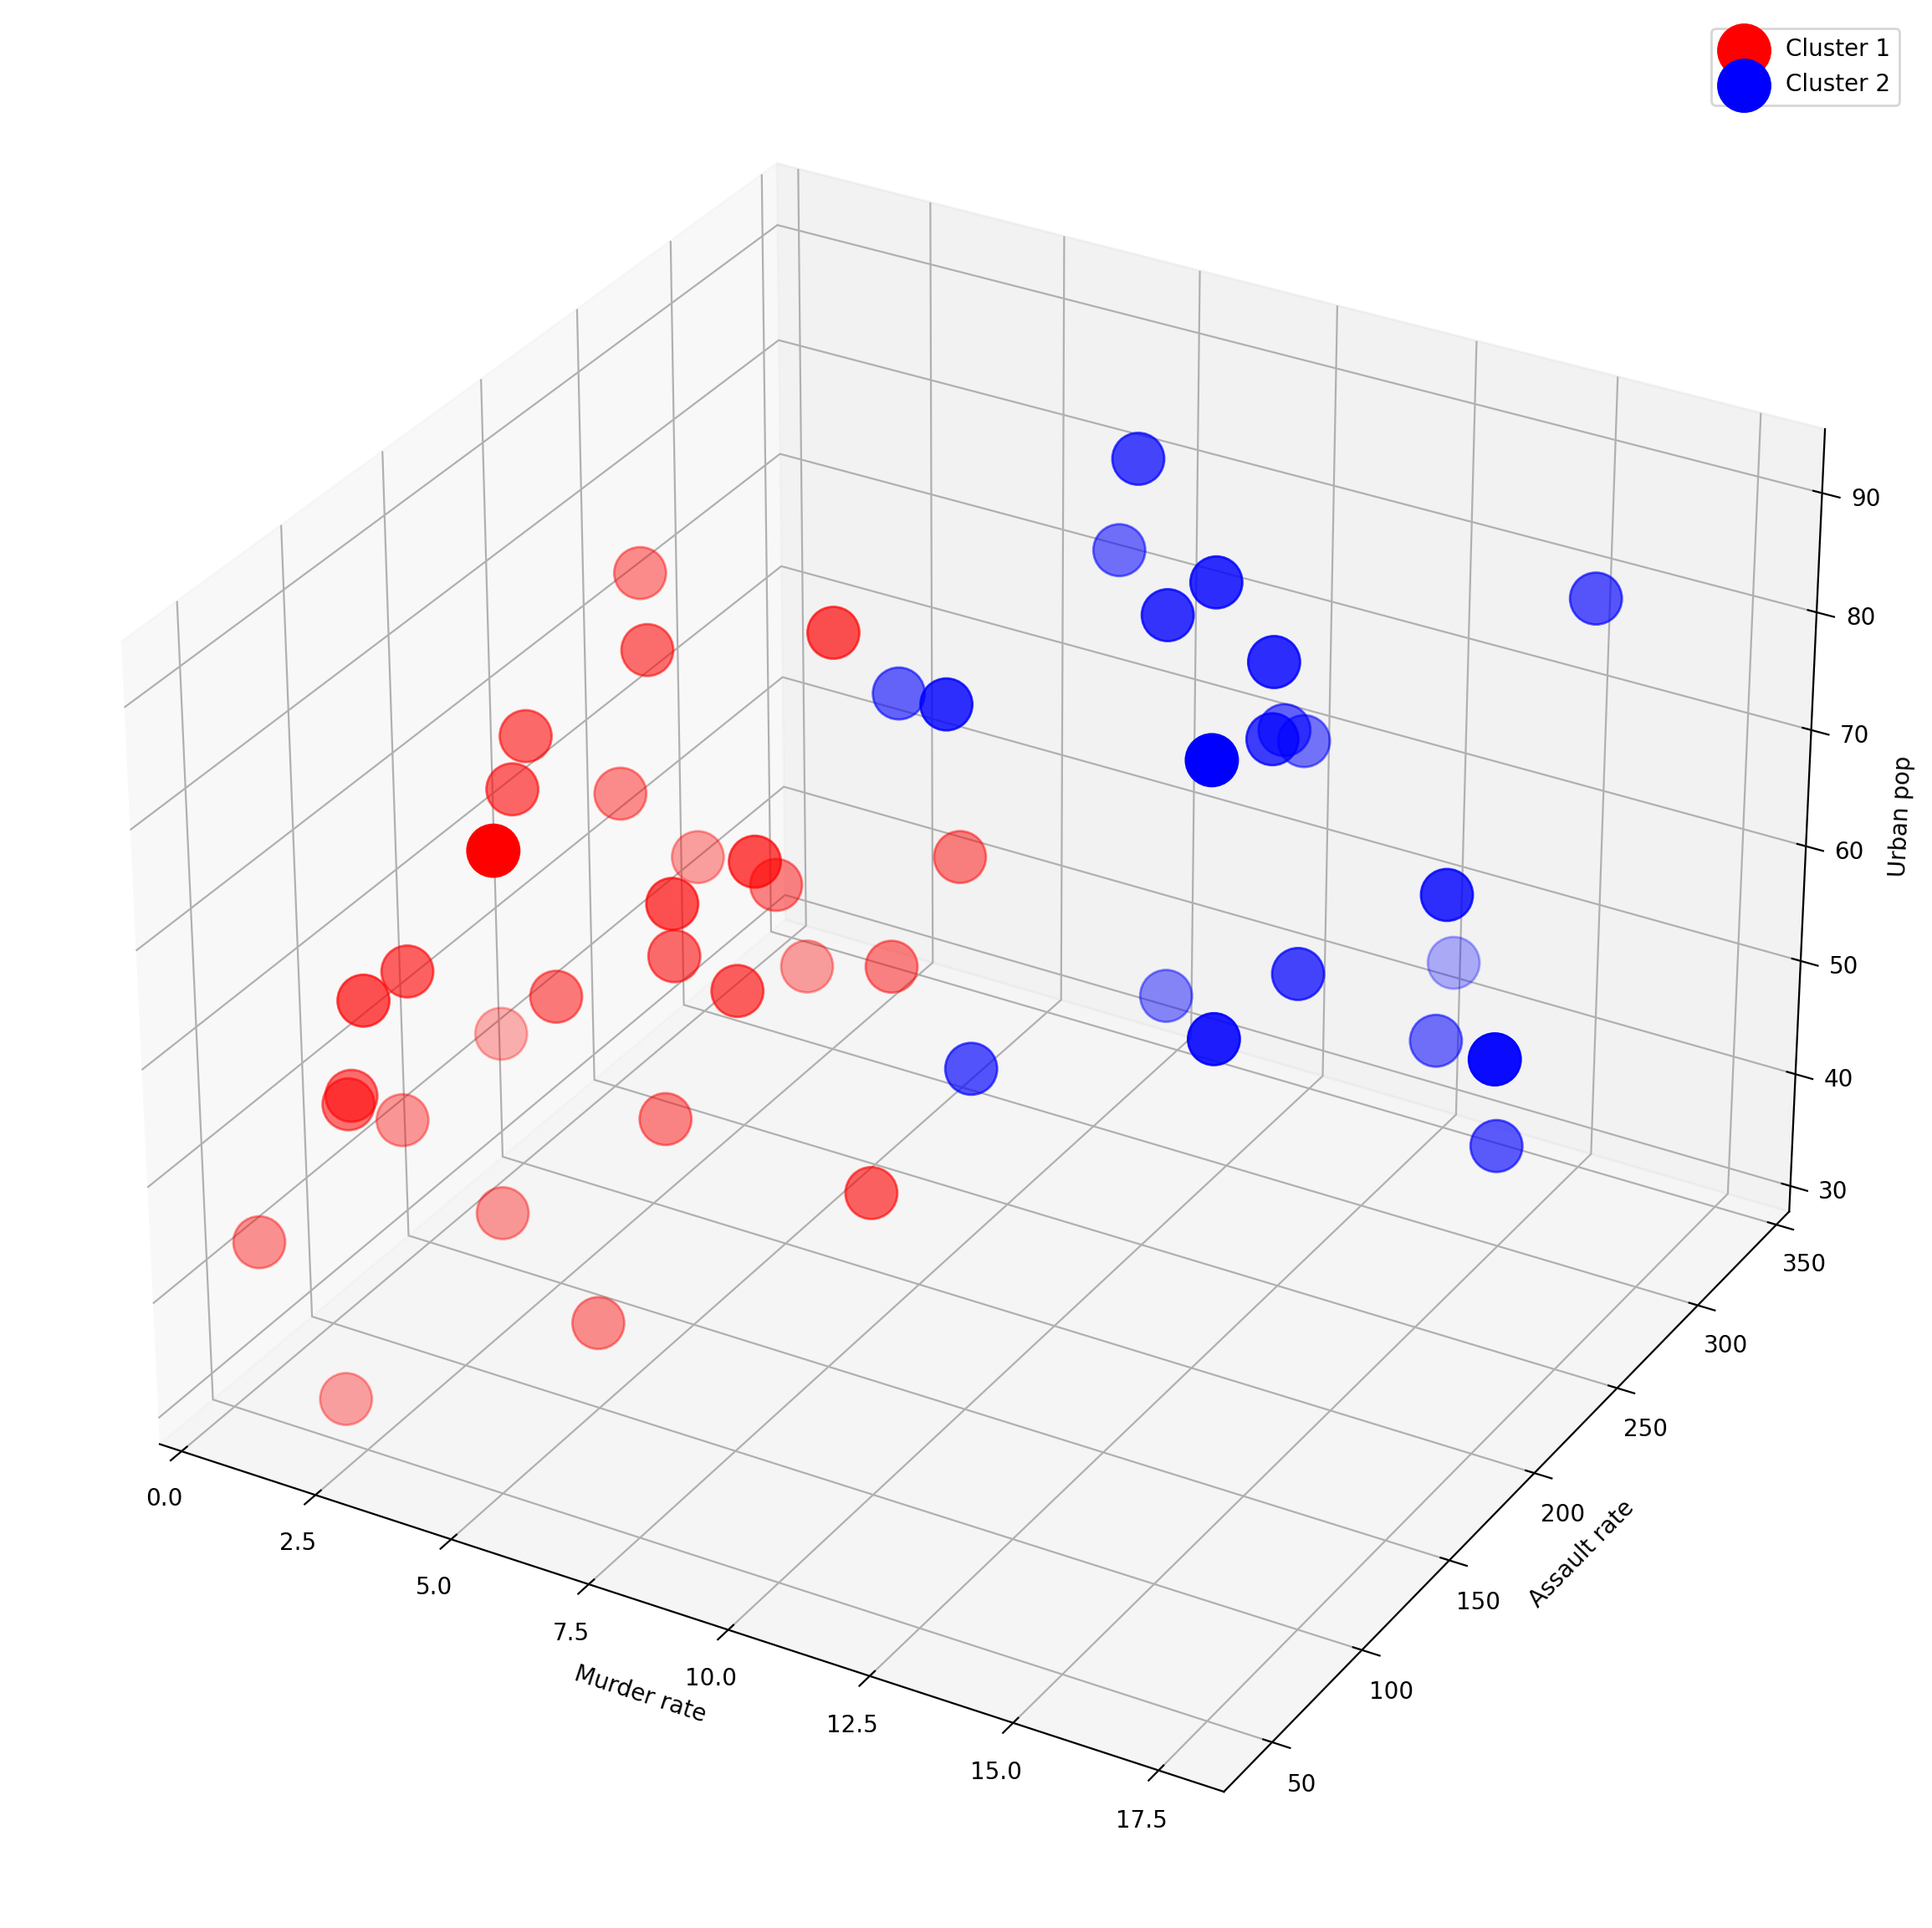

In [85]:
fig = plt.figure(figsize = (15,15), dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 500, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 500, c = 'blue', label = 'Cluster 2')
# ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 500, c = 'green', label = 'Cluster 3')

ax.set_xlabel('Murder rate')
ax.set_ylabel('Assault rate')
ax.set_zlabel('Urban pop')

ax.legend()
plt.show()

### With rape column

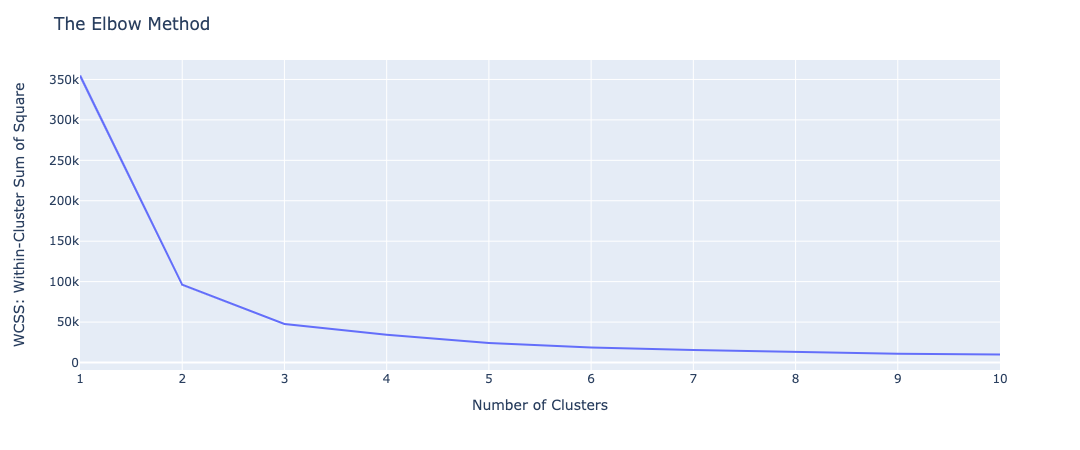

In [86]:
column_to_move = df.pop("Murder")

# insert column with insert(location, column_name, column_value)

df.insert(4, "Murder", column_to_move)

column_to_move = df.pop("Rape")

# insert column with insert(location, column_name, column_value)

df.insert(1, "Rape", column_to_move)

# assign to x
X = df.iloc[:, 1:4].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = px.line(x=range(1,11), y=wcss)

# edit the layout
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Number of Clusters',
                   yaxis_title='WCSS: Within-Cluster Sum of Square')

fig.show()

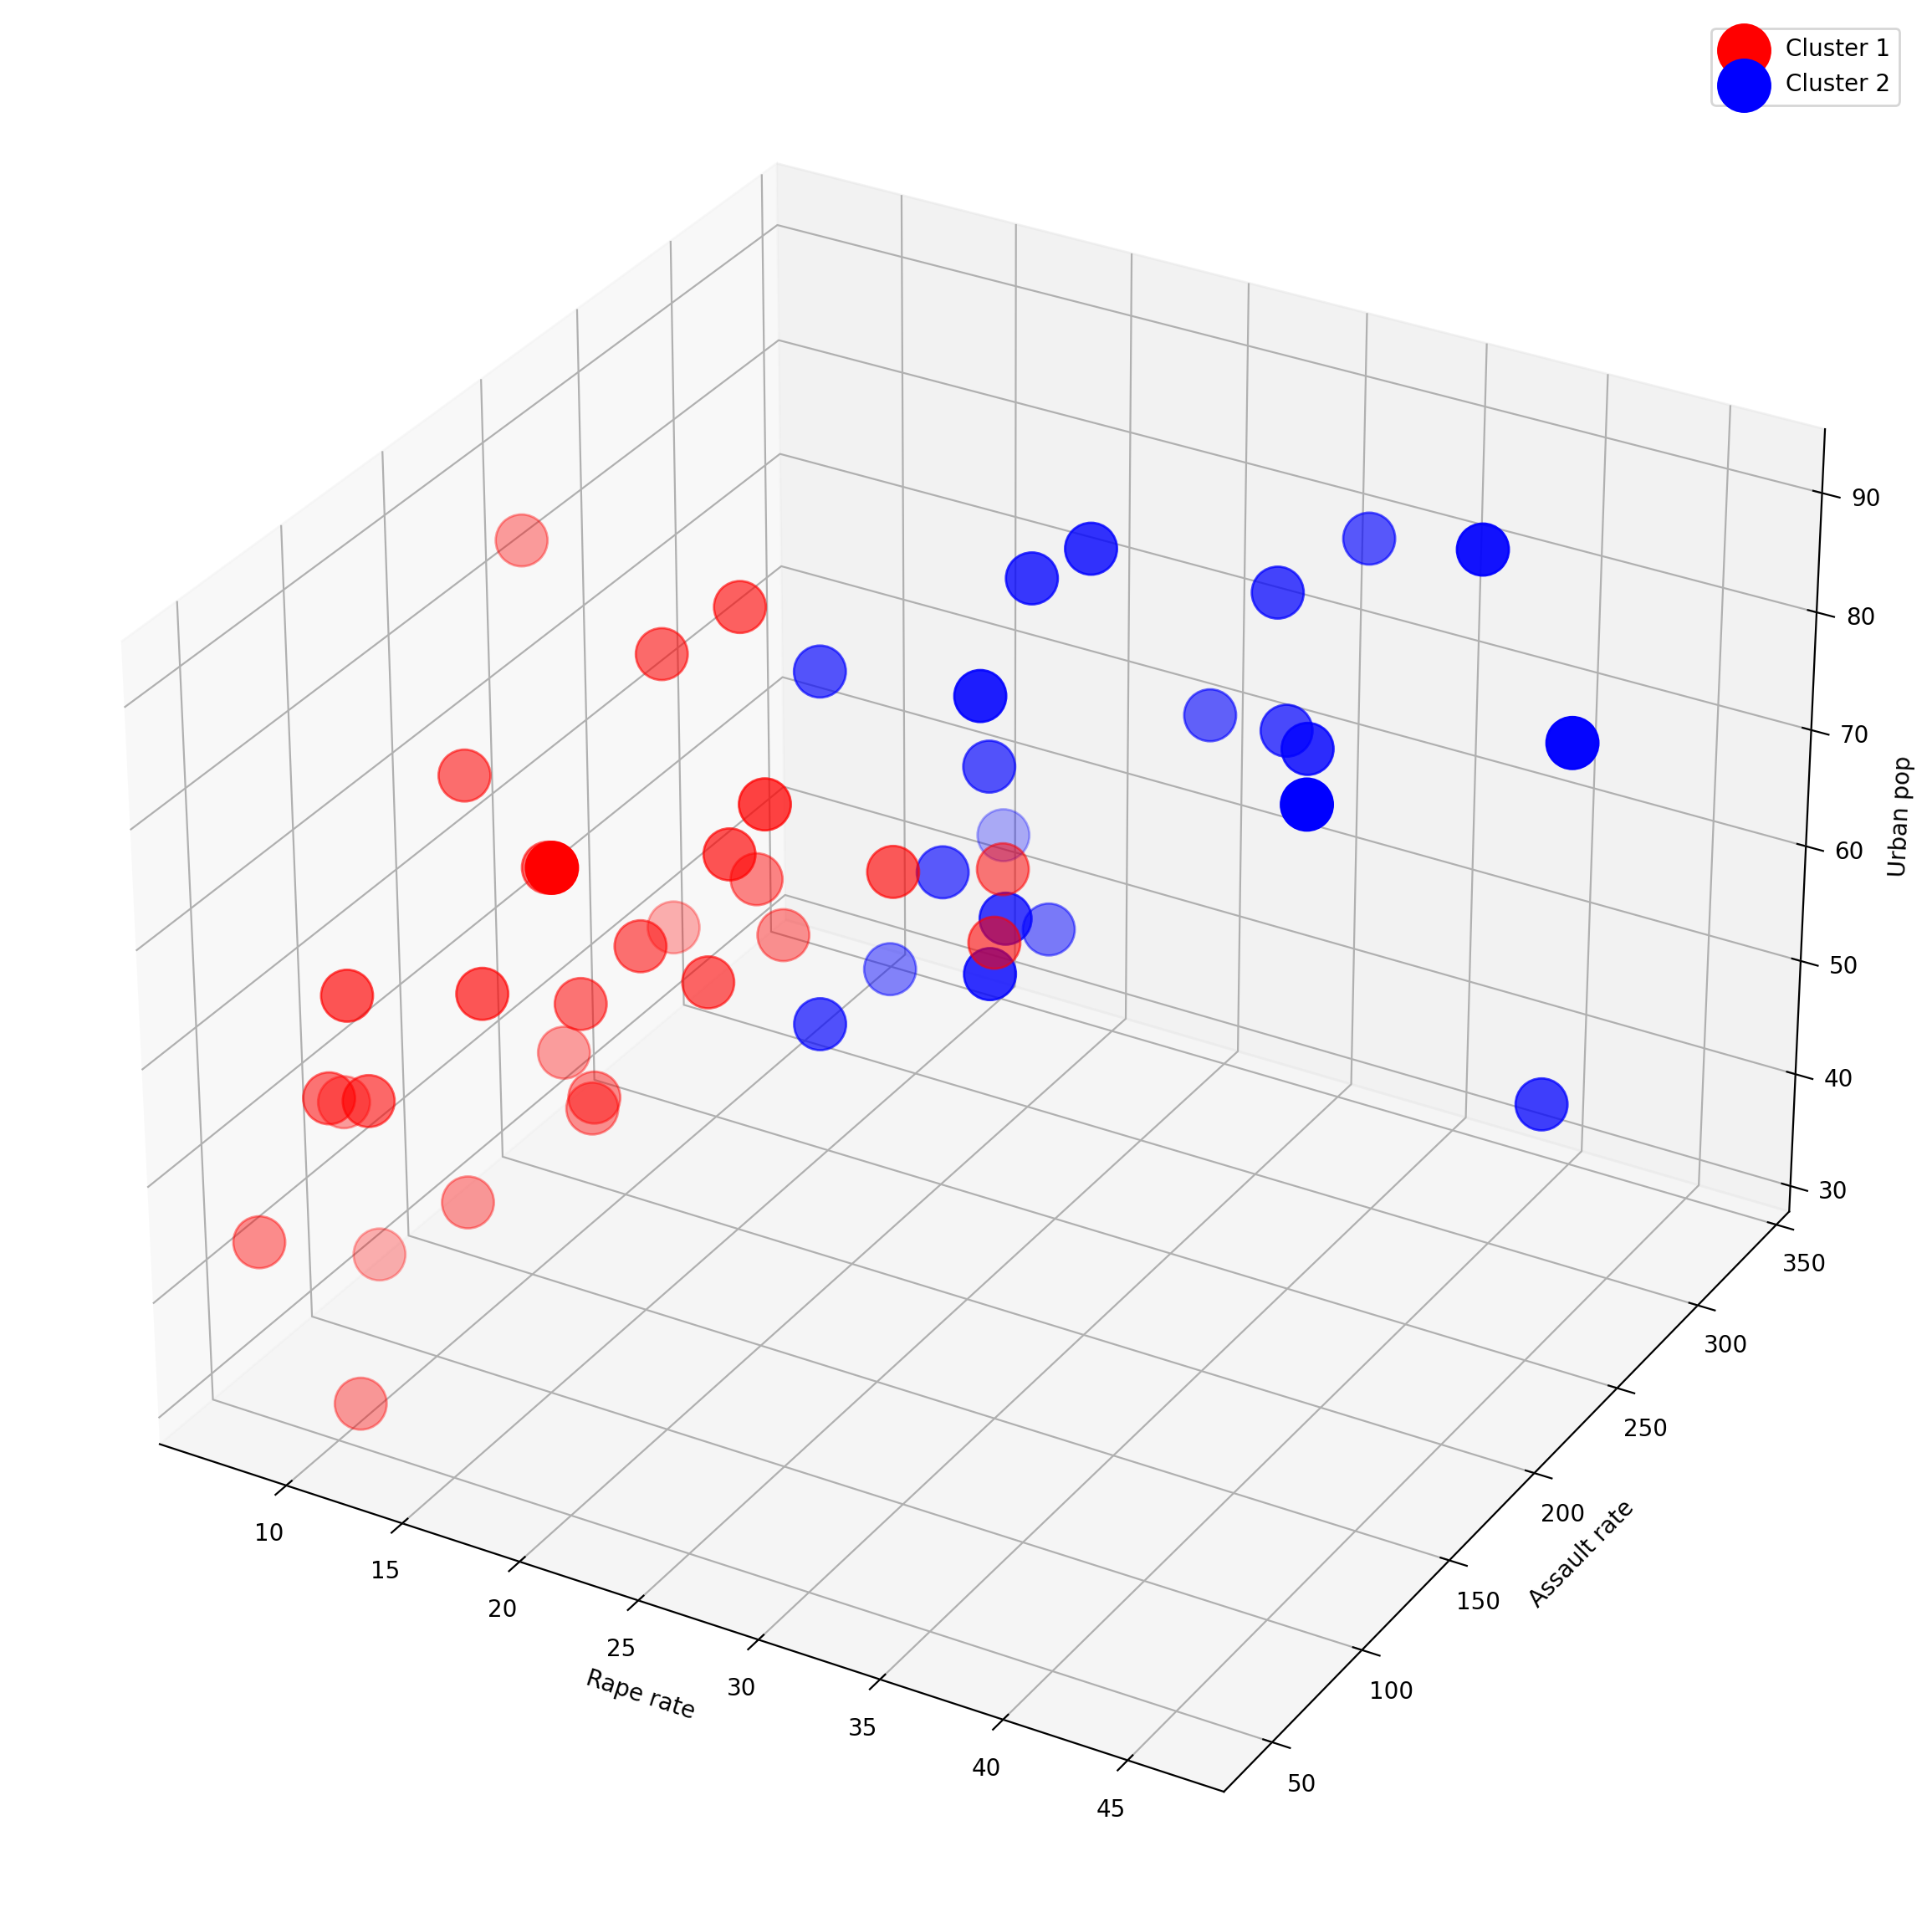

In [87]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

fig = plt.figure(figsize = (15,15), dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 500, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 500, c = 'blue', label = 'Cluster 2')
# ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 500, c = 'green', label = 'Cluster 3')

ax.set_xlabel('Rape rate')
ax.set_ylabel('Assault rate')
ax.set_zlabel('Urban pop')

ax.legend()
plt.show()